In [1]:
# import packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
data = sio.loadmat('EBAY_20141119.mat')

In [3]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

In [17]:
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

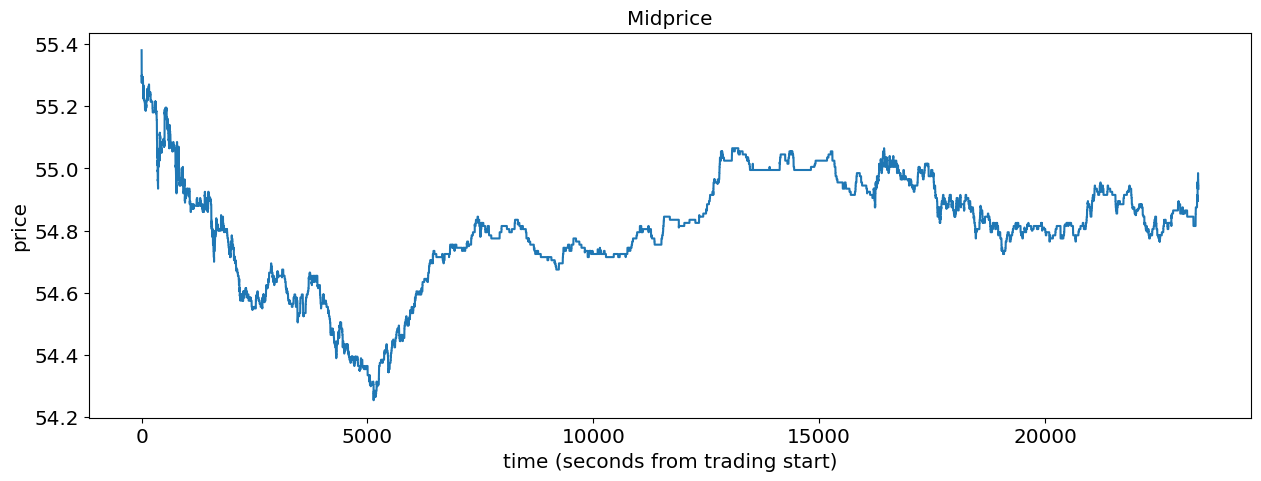

In [18]:
plt.plot(t, midprice)
plt.title('Midprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [19]:
type(midprice)

numpy.ndarray

In [20]:
import pandas as pd

In [21]:
midp = pd.DataFrame(midprice)

In [22]:
midp.describe()

,0
count,234000.000000
mean,54.807096
std,0.176470
min,54.255000
25%,54.725000
50%,54.815000
75%,54.925000
max,55.380000


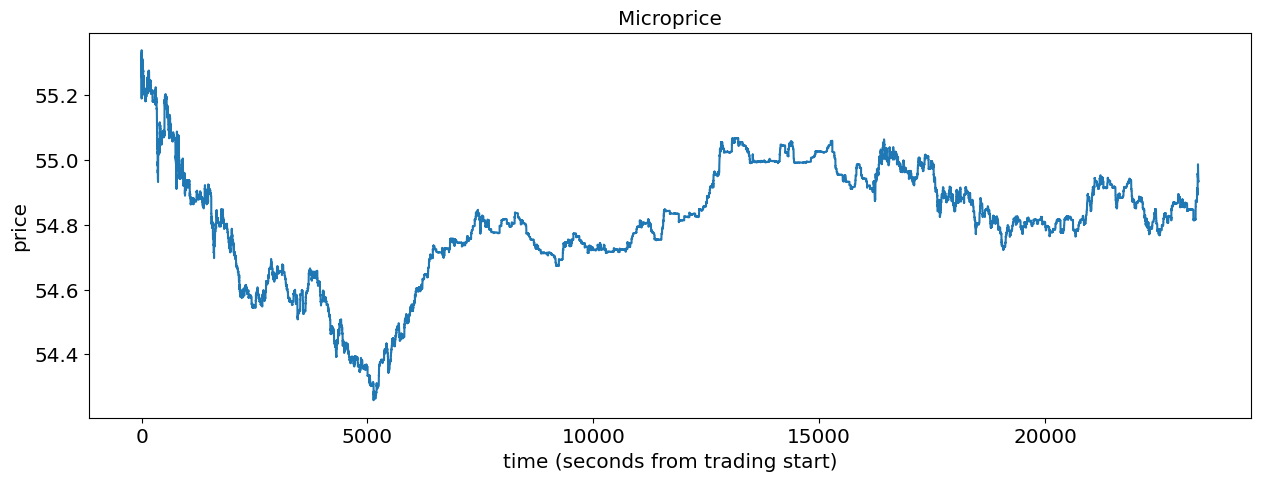

In [23]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [24]:
microp = pd.DataFrame(microprice)

In [25]:
microp.describe()

,0
count,234000.000000
mean,54.806953
std,0.176827
min,54.258000
25%,54.725042
50%,54.814931
75%,54.928342
max,55.339506


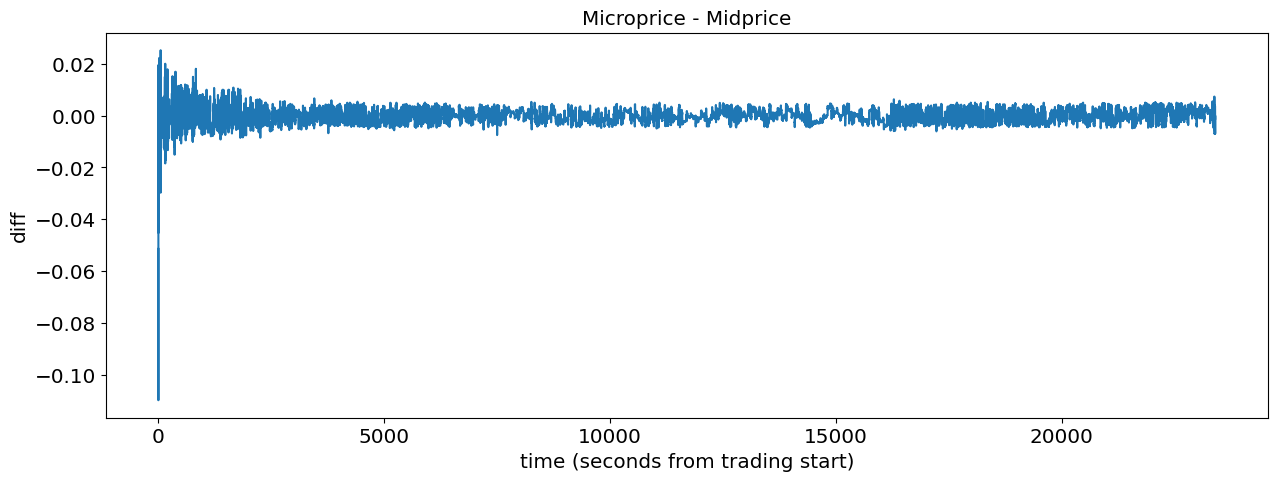

In [26]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

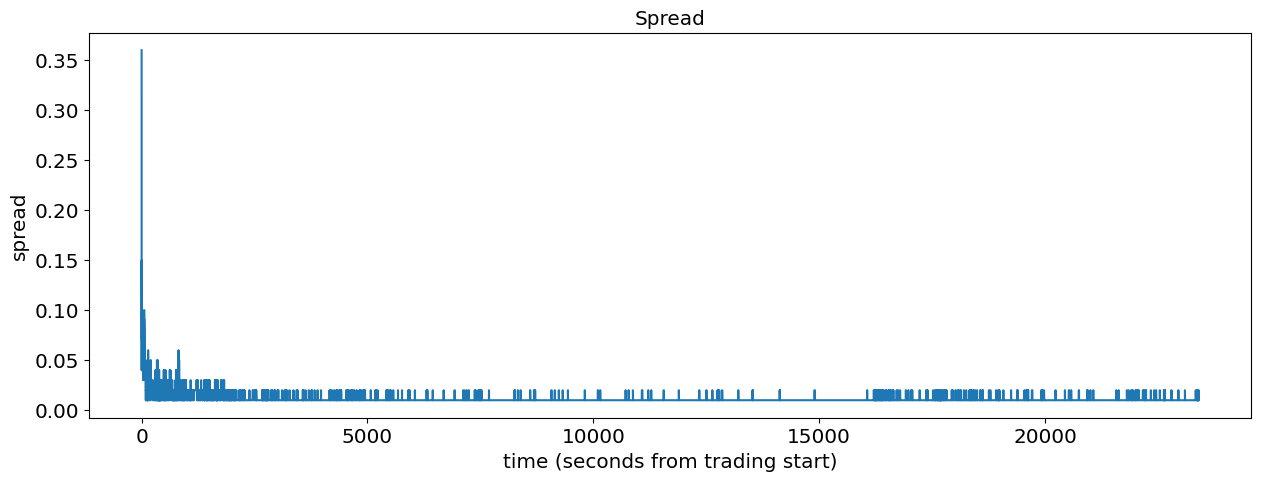

spread: 0.01


In [27]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()
print(f"spread: {np.mean(spread):.2f}")

In [28]:
spread = pd.DataFrame(spread)

In [29]:
spread.describe()

,0
count,234000.000000
mean,0.011068
std,0.005226
min,0.010000
25%,0.010000
50%,0.010000
75%,0.010000
max,0.360000


In [30]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

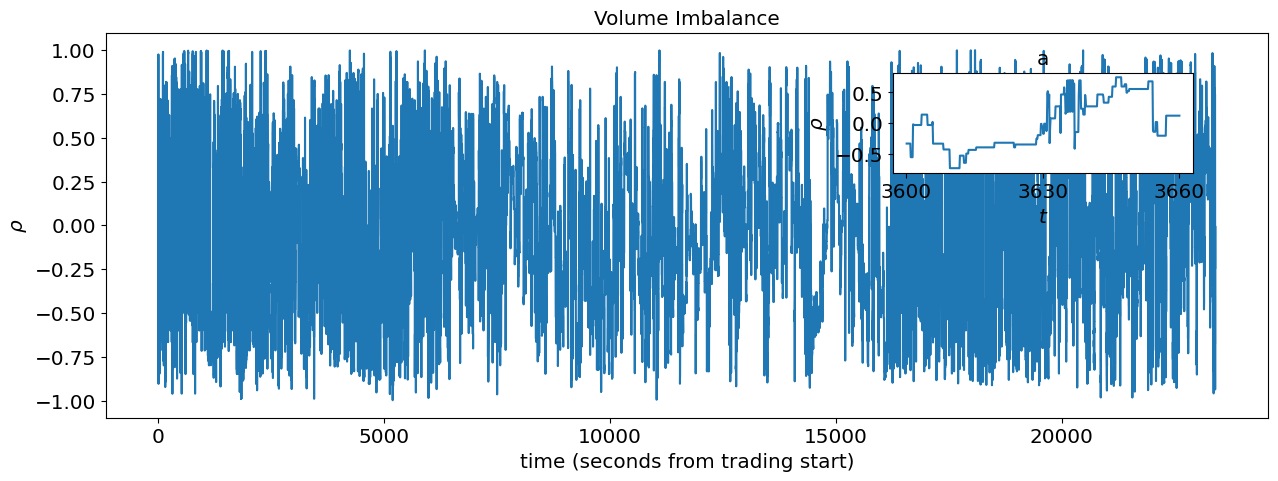

In [31]:
plt.plot(t, rho)
plt.title('Volume Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

In [32]:
rho = pd.DataFrame(rho)

In [33]:
rho.describe()

,0
count,234000.000000
mean,-0.032488
std,0.432033
min,-0.998257
25%,-0.367039
50%,-0.040693
75%,0.294118
max,0.999272
